In [1]:
# !pip install seabon

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
def f1(x1, x2):
    return x1 - math.cos(x2) - 1

def f2(x1, x2):
    return x2 - math.log10(x1 + 1) - 1

def phi1(x1, x2):
    return math.cos(x2) + 1

def phi2(x1, x2):
    return math.log10(x1 + 1) + 1

# def f1(x1, x2):
#     return 0.1*x1*x1 + x1 + 0.2*x2*x2 - 0.3

# def f2(x1, x2):
#     return 0.2*x1*x1 + x2 - 0.1*x2*x1 - 0.7

def nabla(f, x1, x2, eps=0.0001):
    return [(f(x1 + eps, x2) - f(x1, x2))/eps, (f(x1, x2 + eps) - f(x1, x2))/eps]


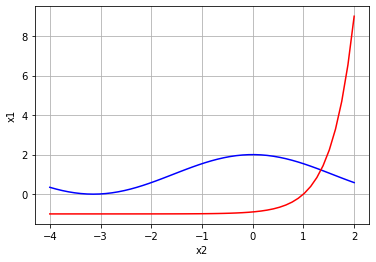

In [3]:
x = np.linspace(-4, 2)

plt.xlabel("x2")
plt.ylabel("x1")
plt.grid()
plt.plot(x, [1 + math.cos(i) for i in x], c='blue')
plt.plot(x, [10**(i-1)-1 for i in x], c='red')
None

# Метод Ньютона для решения СНЛАУ

In [4]:
def lu_dec(A):
    """
    Функция LU разложения матрицы
    :param A: Матрица, которую нужно разложить
    :return L, U: Мтарицы L, U
    """
    n = len(A)
    L = [[1 if i == j else 0 for i in range(n)] for j in range(n)]
    U = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            if i <= j:
                U[i][j] = A[i][j] - sum([L[i][k] * U[k][j] for k in range(i)])
            else:
                L[i][j] = (A[i][j] - sum([L[i][k] * U[k][j] for k in range(j)])) / U[j][j]

    return L, U


def decision(arr, b=None):
    """
    Решение СЛАУ методом LU разложения
    :param arr: A|B
    :return x:
    """
    n = len(arr)
    if b is None:
        A = [[arr[i][j] for j in range(len(arr[i]) - 1)] for i in range(len(arr))]
        b = [arr[i][len(A[0])] for i in range(n)]
    else:
        A = arr

    L, U = lu_dec(A)

    # L * y  = b
    y = [0 for i in range(n)]
    for i in range(n):
        y[i] = (b[i] - sum([L[i][k] * y[k] for k in range(i)]))

    x = [0 for i in range(n)]

    for i in range(n - 1, -1, -1):
        x[i] = round((y[i] - sum([U[i][k] * x[k] for k in range(i + 1, n)])) / U[i][i], 4)

    return x


def det(A):
    det = 1
    L, U = lu_dec(A)
    for i in range(len(A) - 1):
        det *= L[i][i] * U[i][i]
        
    return det


def Newthon(x0, eps=0.000001):
    x = np.array(x0)
    x0 = np.array([9999 for i in range(len(x))])
    
    n = 0
    
    while math.sqrt(sum([i*i for i in [x[i] - x0[i] for  i in range(len(x))]])) > eps:
        x0 = x
        n += 1
#         df1 = nabla(f1, *x)
#         df2 = nabla(f2, *x)
#         detJ = df1[0]*df2[1] - df1[1]*df2[0]
#         detA1 = f1(*x)*df2[1] - df1[1]*f2(*x)
#         detA2 = df1[0]*f2(*x) - f1(*x)*df2[0]
# #         print(detA1, detA2, detJ)
        
#         x = [x[0] - detA1/detJ, x[1] - detA2/detJ]
        
        J = [nabla(f1, *x), nabla(f2, *x)]
        b = [-f1(*x), -f2(*x)]
        d = decision(J, b)
        x = [x[i] + d[i] for i in range(len(x))]
        
    return x, n

x_0 = 0 0
eps = 0.000001
Найденный корень: [1.2221000000000002, 1.3468]
Кол-во итераций: 4


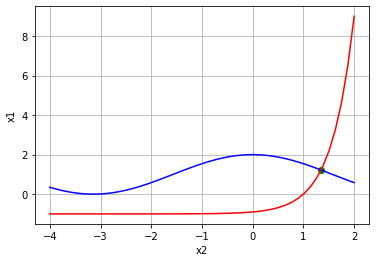

In [11]:
x_begin = list(map(float, input('x_0 = ').split()))
eps = float(input('eps = '))
xk, n = Newthon(x_begin, eps)
print('Найденный корень:', xk)
print('Кол-во итераций:', n)



x = np.linspace(-4, 2)

plt.xlabel("x2")
plt.ylabel("x1")
plt.grid()
plt.plot(x, [1 + math.cos(i) for i in x], c='blue')
plt.plot(x, [10**(i-1)-1 for i in x], c='red')
plt.scatter(xk[1], xk[0], c='green')
None

# Метод простых итераций для решения СНЛАУ 

In [12]:
def simp_iter(x0, eps=0.0001):
    x = np.array(x0)
    x0 = np.array([9999 for i in range(len(x))])
    i = 0
    while math.fabs(max(x[0]-x0[0], x[1]-x0[1])) > eps:
        x0 = x
        x = [phi1(*x0), phi2(*x0)]
#         print(x, x0)
        i+=1
        
    return x, i

x_0 = 1 1
eps = 0.0001
Найденный корень: [1.2220773279636292, 1.3467853452018015]
Кол-во итераций: 11


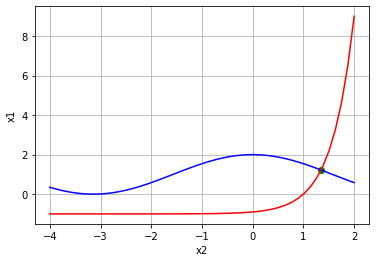

In [14]:
x_begin = list(map(float, input('x_0 = ').split()))
eps = float(input('eps = '))
xk, n = simp_iter(x_begin, eps)
print('Найденный корень:', xk)
print('Кол-во итераций:', n)


x = np.linspace(-4, 2)

plt.xlabel("x2")
plt.ylabel("x1")
plt.grid()
plt.plot(x, [1 + math.cos(i) for i in x], c='blue')
plt.plot(x, [10**(i-1)-1 for i in x], c='red')
plt.scatter(xk[1], xk[0], c='green')
None

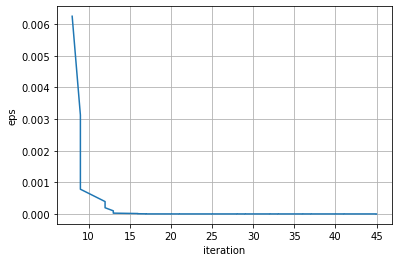

In [20]:
it = []
arr = [0.1/(2**i) for i in range(4, 50)]
for eps in arr:
    a, i = simp_iter([4, -2], eps)
    it.append(i)

epsarr = arr
epsarr.reverse()
it.reverse()

plt.grid(True)
plt.ylabel('eps')
plt.xlabel('iteration')

plt.plot(it, epsarr)